In [2]:
!unzip "/content/drive/MyDrive/Digitalxray.zip"

Archive:  /content/drive/MyDrive/Digitalxray.zip
  inflating: MedicalExpert-I/0Normal/NormalG0 (1).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (10).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (100).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (101).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (102).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (103).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (104).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (105).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (106).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (107).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (108).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (109).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (11).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (110).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (111).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (112).png  
  inflating: MedicalExpert-

In [50]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
# function to display images
def show_images(path):
    labels = list(os.listdir(path))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    random_indices = random.sample(range(1, 101), 10)

    for i, idx in enumerate(random_indices, 1):
        file_path = os.path.join(path, labels[idx])
        image = Image.open(file_path)
        subplot_row = (i - 1) // 5
        subplot_col = (i - 1) % 5
        axes[subplot_row, subplot_col].imshow(image)
        axes[subplot_row, subplot_col].axis('off')
    plt.tight_layout()
    plt.show()

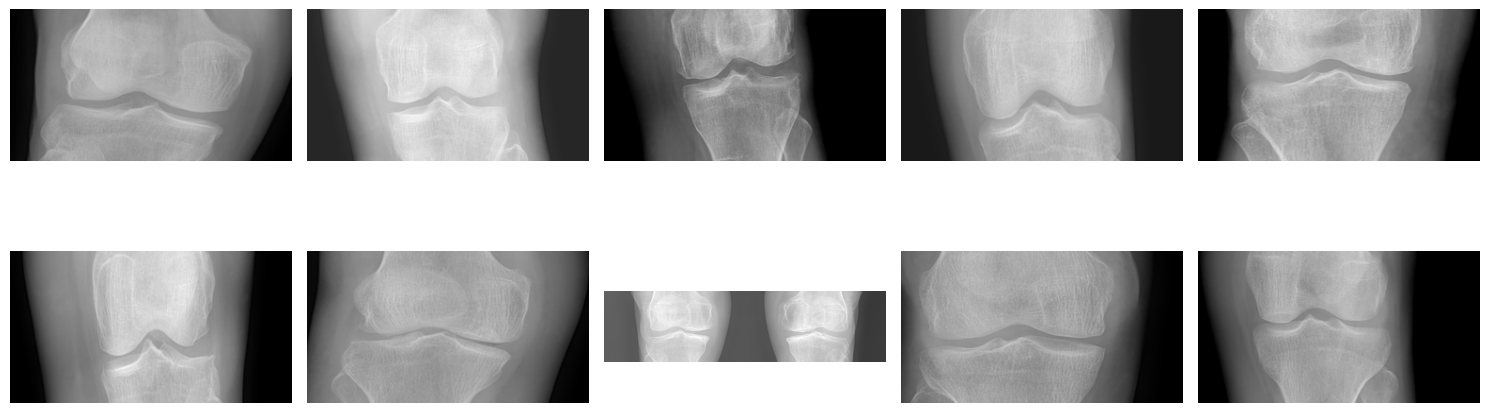

In [5]:
show_images('/content/MedicalExpert-I/0Normal')

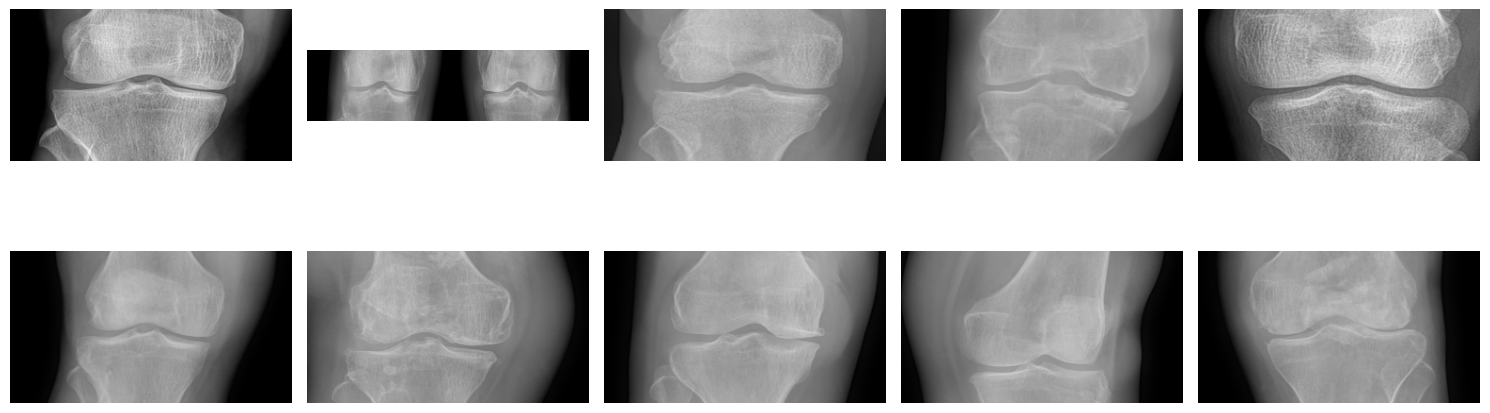

In [6]:
show_images('/content/MedicalExpert-I/1Doubtful')

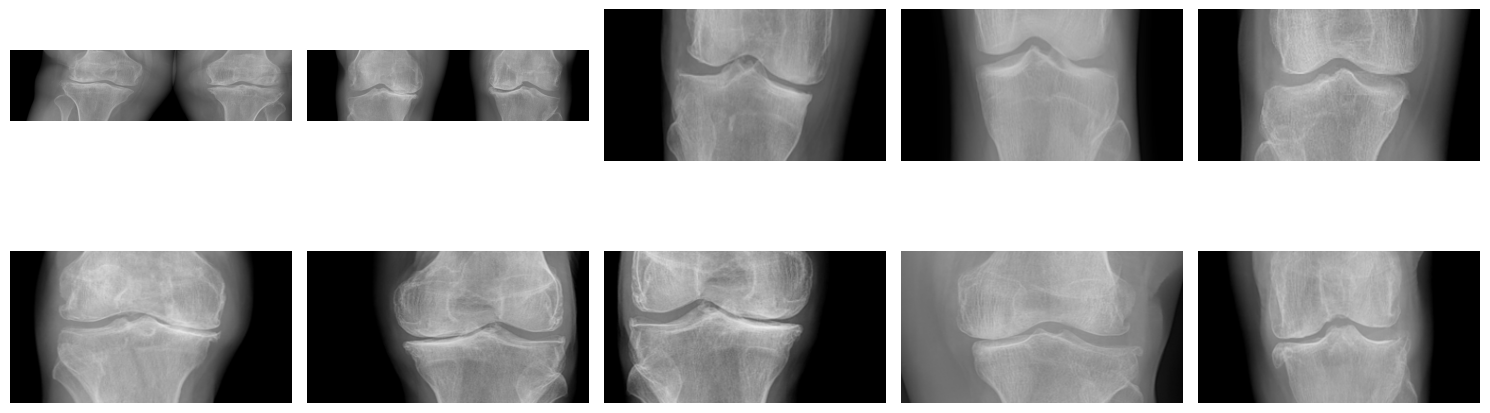

In [7]:
show_images('/content/MedicalExpert-I/2Mild')

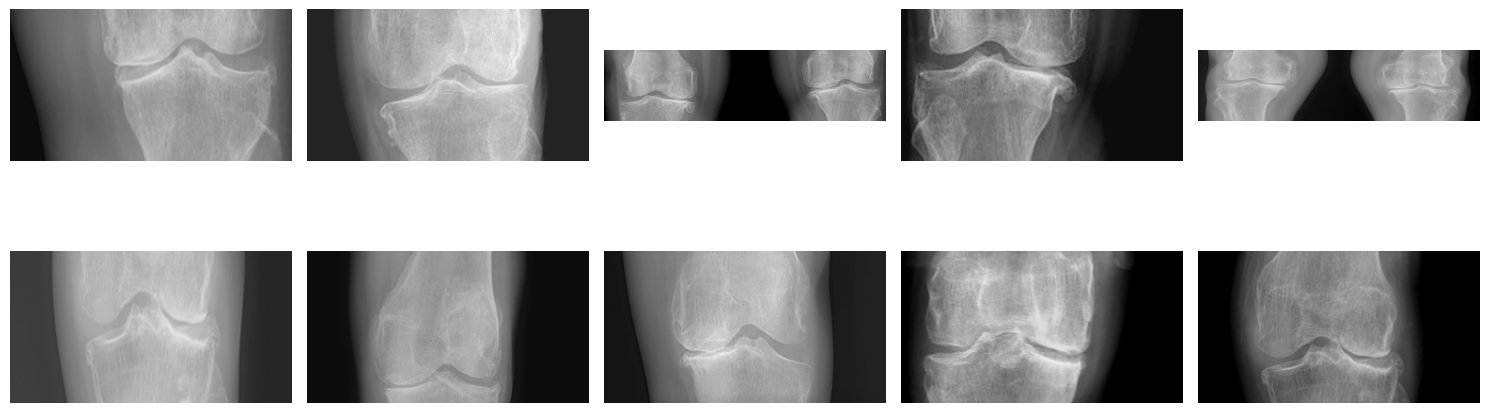

In [8]:
show_images('/content/MedicalExpert-I/3Moderate')

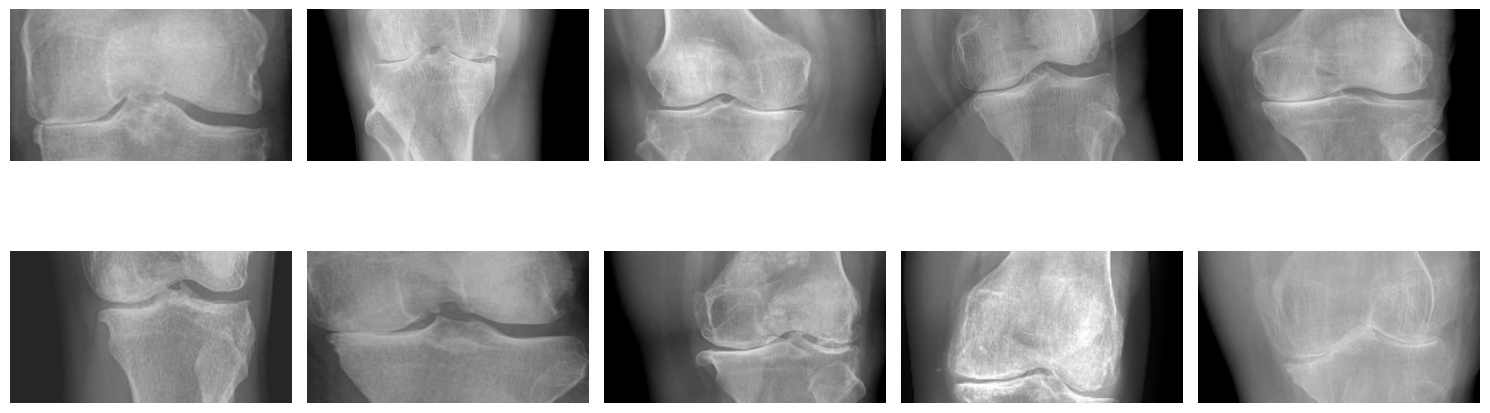

In [9]:
show_images('/content/MedicalExpert-I/4Severe')

In [10]:
# Reading and merging the data
def read_data(path,image_size,classes):
    X = []
    y = []
    gamma = 1.8
    labels = os.listdir(path)
    for label in labels:
        try:
            for image in os.listdir(path + '/' +label):
                img = cv2.imread(path + '/' +label + '/' + image)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img,(image_size, image_size))
                X.append(img)
                y.append(classes[label])
        except:
            pass
    return np.array(X), np.array(y)

In [11]:
knee2_classes = {'0Normal': 0, '1Doubtful' : 1, '2Mild' : 2, '3Moderate' : 3,'4Severe' : 4}
x_traindig_knee,y_traindig_knee = read_data('/content/MedicalExpert-I',200,knee2_classes)
x_testdig_knee,y_testdig_knee = read_data('/content/MedicalExpert-II',200,knee2_classes)
x_traindig_knee,y_traindig_knee = shuffle(x_traindig_knee,y_traindig_knee ,random_state = 42)
x_testdig_knee,y_testdig_knee = shuffle(x_testdig_knee,y_testdig_knee,random_state = 42)

In [12]:
x_knee = np.concatenate((x_traindig_knee,x_testdig_knee))
x_knee.shape

(3300, 200, 200)

In [13]:
y_knee = np.concatenate((y_traindig_knee,y_testdig_knee))
y_knee.shape

(3300,)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_knee,y_knee,test_size = 0.25,random_state = 42)

In [15]:
print(x_train.shape)
print(x_test.shape)

(2475, 200, 200)
(825, 200, 200)


In [16]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())
x_train = x_train / 255
x_test = x_test / 255
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train.shape

(2475, 5)

In [51]:
from keras.layers import *
img_input = Input(shape=(200,200, 1))
img_conc = Concatenate()([img_input, img_input, img_input])
Model2= InceptionV3(input_tensor=img_conc, include_top=False)
#include_top=false removes the classification layer that was trained on ImageNet
#dataset
Model2.trainable=False #set the model as not trainable.
#preprocessing input
Model2.summary()

87910968/87910968 [==============================] - 6s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 concatenate_2 (Concatenate  (None, 200, 200, 3)          0         ['input_5[0][0]',             
 )                                                                   'input_5[0][0]',             
                                                                     'input_5[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 99, 99, 32)           864       ['concatenate_2[0][0]']       
                      

In [52]:
Model2.trainable=True
set_trainable=False

for layer in Model2.layers:
  if layer.name=='conv2d_91':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in Model2.layers:
  print(layer.name,layer.trainable)

input_5 False
concatenate_2 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed0 False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalizati

In [53]:
model = Sequential()

In [54]:
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Model2)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [56]:
model.fit(x_train,y_train,epochs = 150,validation_data = (x_test,y_test))

Epoch 1/150
78/78 [==============================] - 23s 169ms/step - loss: 2.0696 - accuracy: 0.3059 - val_loss: 1.3397 - val_accuracy: 0.3770
Epoch 2/150
78/78 [==============================] - 7s 93ms/step - loss: 1.3791 - accuracy: 0.3818 - val_loss: 1.1731 - val_accuracy: 0.4788
Epoch 3/150
78/78 [==============================] - 7s 92ms/step - loss: 1.2048 - accuracy: 0.4691 - val_loss: 1.0060 - val_accuracy: 0.6024
Epoch 4/150
78/78 [==============================] - 6s 80ms/step - loss: 1.1362 - accuracy: 0.4933 - val_loss: 0.9973 - val_accuracy: 0.5927
Epoch 5/150
78/78 [==============================] - 6s 77ms/step - loss: 1.0323 - accuracy: 0.5446 - val_loss: 0.8755 - val_accuracy: 0.6824
Epoch 6/150
78/78 [==============================] - 6s 78ms/step - loss: 0.9598 - accuracy: 0.6008 - val_loss: 0.7503 - val_accuracy: 0.7103
Epoch 7/150
78/78 [==============================] - 6s 76ms/step - loss: 0.8611 - accuracy: 0.6299 - val_loss: 0.7224 - val_accuracy: 0.7055
Epoc

In [57]:
predictions = np.argmax(model.predict(x_test),1)

26/26 [==============================] - 3s 53ms/step


In [ ]:
print("Target variable shape:", y_train.shape)
print("Model output shape:", model.output_shape)

Target variable shape: (2475, 9)
Model output shape: (None, 5)


In [58]:
y_train

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [59]:
ytrue = np.argmax(y_test,axis = 1)
print( confusion_matrix(y_true= ytrue,y_pred = predictions) )

[[243  17   0   0   2]
 [  2 215   9   2   2]
 [  2   8 107   0   0]
 [  0   0  10 103   0]
 [  0   4  13   0  86]]


In [60]:
print(classification_report(y_true= ytrue,y_pred = predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       262
           1       0.88      0.93      0.91       230
           2       0.77      0.91      0.84       117
           3       0.98      0.91      0.94       113
           4       0.96      0.83      0.89       103

    accuracy                           0.91       825
   macro avg       0.91      0.90      0.91       825
weighted avg       0.92      0.91      0.92       825



In [61]:
model.save('digitalkneeinception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
